##  Programmieraufgabe 4

In [4]:
# some setup
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
from math import factorial

## Newtonsche Darstellung und Auswertung des Interpolationspolynoms

Sei $I = [a,b]$ ein Interval und $f \in C(I)$ eine stetige Funktion. 
Sei $x = \{x_0, \ldots, x_n\}$  eine Liste von St&uuml;tzstellen und $y = \{y_0, \ldots, y_n\}$ eine Liste von Funktionsauswertungen, d.h. $y_i = f(x_i)$ f&uuml;r $i = 0, \ldots, n$.

a)  Implementieren Sie einen Algorithmus, der basierend auf den Listen $x$ und $y$ eine Liste $z = \{ z_0, \ldots, z_n \}$ von dividierten Differenzen gem&auml;ss des Dreicksschemas berechnet, wobei

 \begin{equation}
 z_i = f[x_0, \ldots, x_i] \, , \quad i = 0, \ldots, n\, .
 \end{equation}

b) Implementieren Sie eine Funktion, die basierend auf einer Liste $x$ von St&uuml;tzstellen und einer Liste $z$ von dividierten Differenzen die Auswertung des interpolierenden Polynoms $p \in \Pi_n$ an einer Stelle $t \in [a,b]$ mit Hilfe des Horner-Schemas berechnet.

c) Testen Sie Ihren Code mit der Funktion $f(t) = 1/(1+25t^2)$ auf $I = [-1,1]$. 
Benutzen Sie &auml;quidistante St&uuml;tzstellen mit n = 5, 10, 15, 20. 
Plotten Sie dazu die interpolierenden Polynome sowie die Funktion $f$ in eine Achse.

d)Wiederholen Sie die Aufgabe mit denselben Werten f&uuml;r  $n$, aber unter Verwendung von Tschebyschevknoten 
$x_k = \cos\Big(\frac{2k+1}{2n}\pi\Big)$, $k=0,...,n-1$, als St&uuml;tzstellen.

e) Berechnen und plotten Sie die $n$-ten Bernsteinpolynome $B_nf$. Beachten Sie, dass eine Reskalierung vorgenommen werden muss. Betrachten Sie $g(t) = f(2t-1)  $

In [293]:
#### dividierte Differenzen
def computeDivDiff( x, y ) :
    n = len(x); #here i put in a -1
    #z = np.zeros(n);
    #div = np.zeros(n);
    
    #Insert code here
    z=[]
    z2=[0] #temporary memory
    for i in range(n): #fill z and z2 with lists of function values and corresponding points
        z.append([[x[i]],y[i]])
        z2.append([[x[i]],y[i]])
    #print("initial z",z)
    

    for k in range(n-1): #we need n-1 more 
        for i in range(k,n-1): #work on lower part of list
            z2[i+1][1]=(z[i+1][1]-z[i][1])/(z[i+1][0][-1]-z[i][0][0]) #set temporary y-value to divided differenve
            z2[i+1][0]=z[i][0] #set temporary x-list to that of z[i] 
            z2[i+1][0].append(z[i+1][0][-1]) #and append the last element of x-list of z[i+1]
            
        for i in range(k,n-1): #set z to computed values stored in z2
            z[i+1][0]=z2[i+1][0]
            z[i+1][1]=z2[i+1][1]
    #print("z after computation",z)
    
    w=[]
    for i in range(n):
        w.append(z[i][1])

    #Insert code here
    
            
    
    return w;
#### Horner schema fuer das Newton-Polynom ausgewertet an t
#### Stuetzstellen x, dividierste Differenzen z
def evalHorner( x, z, t ) :
    
    #Insert code here
    n=len(x)-1
    #print("last element in z is",z[-1])
    val=z[-1] #start evaluation at last entry in z
    for i in range(len(x)-1): #go through the horner sum/product
        j=n-i-1 #go through lists backwards
        val=val*((t-x[j]))+z[j]
    
    return val

### Runge-Funktion 1/(1+25x^2)
def func( t ) :

    return 1/(1+25*t*t)

### Tschebyscheff Stuetzstellen
def getTschebyschevNodes( a, b, n ) :
    x = np.zeros(n);
    for i in np.arange(0,n):
        x[i] = (a-b) * np.cos( (2*i+1) * np.pi / (2*n) ) / 2 + (a+b)/2;
    return(x);

def compute_n_chose_k(n,k):
    enum=1
    denom=1
    for i in range(1,min(k,n-k)+1):
        enum*=n
        denom*=i
        n-=1
    return enum/denom

### n-tes Bernstein-Polynom auf [0,1] ausgewertet an t
### y... Funktionswerte an den aequidistanten Stuetzstellen
def evalBernstein(y,n,t):
    
    #Insert code here
    sum=0
    binom_coef=[]
    for k in range(0,n+1):
            binom_coef.append(compute_n_chose_k(n,k))
            sum+=y[k]*binom_coef[k]*(t**k)*(1-t)**(n-k)
            
    return sum

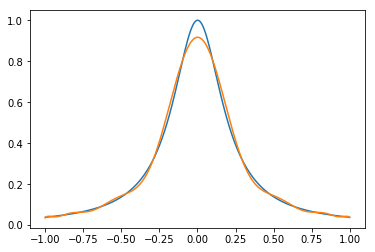

In [300]:
### Test

## Variablen
n = 15;
a = -1;
b = 1;

# erzeuge aequidistantes Gitter bzw. berechne Chebychev-Knoten
#x = np.linspace(a,b,n+1);
x = getTschebyschevNodes(a,b,n+1);

# berechne die Funktionswerte
y = np.zeros(n+1);
for i in np.arange(0,n+1):
    y[i] = func( x[i] );    
    
## berechne dividierte Differenzen    
z = computeDivDiff( x , y);


### plotte Funktion, Interpolierende und Bernsteinpolynom auf feinem Gitter
eps = 0.0;
N = 1000;

r = np.linspace(a - eps, b + eps, N) ;   
f = np.zeros(N);
If = np.zeros(N);
for i in range(N):
    f[i]=func(a+(i/N)*(b-a))
    If[i]=evalHorner(x,z,a+(i/N)*(b-a))

#Insert code here
plt.plot(r,f)
plt.plot(r,If)
plt.show()

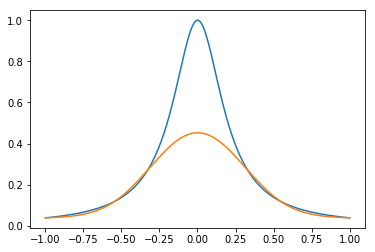

In [301]:
Bnf=np.zeros(N)
for i in range(N):
    Bnf[i]=evalBernstein(y,n,i/N)
plt.plot(r,f)
plt.plot(r,Bnf)
plt.show()